In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import matplotlib as mpl
%matplotlib inline

In [120]:
# 读取txt文件，获得dataframe对象，各记录项设置为names
# 数据清洗，将txt中的str类型Series数据变为float类型数组
# 转化Series中的Object对象为float类型，并将Series转化为数组array,重置为(1440,1)
def get_short(file):
    """
    A helper function to get array date from the dataframe object

    :param file: table file. txt or csv.
            The input data from txt or csv, etc.

    :return: dict
            The dictionary of day, time(min) label and short X-ray flux.
    """
    dates = pd.read_csv(file, names=['YR', 'MO', 'DA', 'HHMM', 'Day', 'Sec', 'Short', 'Long', 'Ratio'], header=None, sep='\s+')
    x_short = dates.loc[19:,'Short'].apply(float).values.reshape(1440,1)
    time = dates.loc[19:,'Sec'].apply(float).values.reshape(1440,1)
    day = str(dates.loc[19,'YR']) + str(dates.loc[19,'MO']) + str(dates.loc[19,'DA'])

    xs_data = {'x_short':x_short,
                'time':time,
                'day':day}

    return xs_data


In [129]:
def my_plotter_xf(ax, data_dict, param_dict):
    """
    A helper function to make plot gragh

    :param ax: Axes
            The axes to draw to
    :param data_dict: dict
            Dictionary of data, including the time label, X_ray_short and day
    :param param_dict: dict
            Dictionary of kwargs to pass to ax.plot

    :return:
            out:list
            list of artists added
    """

    out = ax.plot(data_dict['time']/60, data_dict['x_short'], **param_dict)
    ax.set_yscale('log')
    ax.set_ylim(pow(10,-9),pow(10,-5))
    ax.set_xlim(0,max(data_dict['time'])/60)
    ax.set_ylabel('5 - 40 AI')
    ax.set_xlabel('Time(mins)')
    ax.set_title(data_dict['day'])
    ax.grid()
    return out


In [130]:
xs_data = get_short(r'D:\Goes\Goes_xray\2011\20111231_Gp_xr_1m.txt')


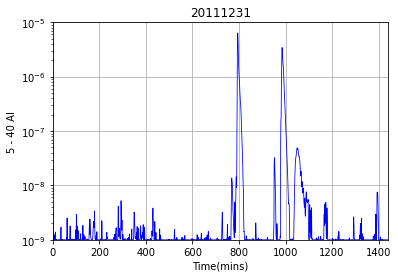

In [131]:
mpl.rcParams['path.simplify_threshold'] = 0.0
fig, ax = plt.subplots()
my_plotter_xf(ax, xs_data, {'color':'b','linewidth':'0.8'})
plt.subplots_adjust()

